<a href="https://colab.research.google.com/github/joshsalako/hamoye/blob/main/bitcoin_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Bitcoin Price Prediction Model

## Importing Dataset
https://www.kaggle.com/datasets/mczielinski/bitcoin-historical-data

In [ ]:
import pandas as pd
import numpy as np
! pip install -q opendatasets
import opendatasets as od
import matplotlib.pyplot as plt
  
od.download(
    "https://www.kaggle.com/datasets/mczielinski/bitcoin-historical-data")

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Skipping, found downloaded files in "./bitcoin-historical-data" (use force=True to force download)


In [ ]:
data = pd.read_csv('/content/bitcoin-historical-data/bitstampUSD_1-min_data_2012-01-01_to_2021-03-31.csv')
data.head()

,Timestamp,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price
0,1325317920,4.39,4.39,4.39,4.39,0.455581,2.0,4.39
1,1325317980,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1325318040,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1325318100,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1325318160,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Binary Classification
Predict if next days' bitcoin price will be higher than todays'

## Dataset Visualization & Feature Engineering

In [ ]:
# Convert to date
data['Datetime'] = pd.to_datetime(data['Timestamp'], unit='s').dt.date
data.head()

,Timestamp,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price,Datetime
0,1325317920,4.39,4.39,4.39,4.39,0.455581,2.0,4.39,2011-12-31
1,1325317980,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2011-12-31
2,1325318040,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2011-12-31
3,1325318100,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2011-12-31
4,1325318160,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2011-12-31


In [ ]:
data.fillna(method = "ffill", inplace = True)
data.isna().sum()

Timestamp            0
Open                 0
High                 0
Low                  0
Close                0
Volume_(BTC)         0
Volume_(Currency)    0
Weighted_Price       0
Datetime             0
dtype: int64

In [ ]:
btc = data.groupby('Datetime')[['Open', 'High', 'Low', 'Close', 'Volume_(BTC)', 
                                'Weighted_Price']].mean()
btc.head()

,Open,High,Low,Close,Volume_(BTC),Weighted_Price
Datetime,,,,,,
2011-12-31,4.472552,4.472624,4.472552,4.472624,7.590527,4.472579
2012-01-01,4.680778,4.680778,4.680778,4.680778,5.861697,4.680778
2012-01-02,5.000000,5.000000,5.000000,5.000000,11.566478,5.000000
2012-01-03,5.145917,5.145917,5.145917,5.145917,13.506125,5.145917
2012-01-04,5.176708,5.228729,5.176708,5.228729,17.221039,5.195443


In [ ]:
btc["tomorrow"] = btc["Weighted_Price"].shift(-1)
# Get target variable; 1 if tomorrow's price is greater than today's
# 0 if otherwise
btc["target"] = (btc["tomorrow"] > btc["Weighted_Price"]).astype(int)
btc["target"].value_counts()

1    1874
0    1502
Name: target, dtype: int64

In [ ]:
btc.head()

,Open,High,Low,Close,Volume_(BTC),Weighted_Price,tomorrow,target
Datetime,,,,,,,,
2011-12-31,4.472552,4.472624,4.472552,4.472624,7.590527,4.472579,4.680778,1
2012-01-01,4.680778,4.680778,4.680778,4.680778,5.861697,4.680778,5.000000,1
2012-01-02,5.000000,5.000000,5.000000,5.000000,11.566478,5.000000,5.145917,1
2012-01-03,5.145917,5.145917,5.145917,5.145917,13.506125,5.145917,5.195443,1
2012-01-04,5.176708,5.228729,5.176708,5.228729,17.221039,5.195443,6.124426,1


In [ ]:
btc.shape

(3376, 8)

In [ ]:
btc.describe()

,Open,High,Low,Close,Volume_(BTC),Weighted_Price,tomorrow,target
count,3376.000000,3376.000000,3376.000000,3376.000000,3376.000000,3376.000000,3375.000000,3376.000000
mean,4605.643918,4608.900833,4602.235824,4605.639839,9.486158,4605.577131,4606.940421,0.555095
std,8207.242214,8213.750279,8200.545699,8207.350280,8.148657,8207.014590,8207.848384,0.497029
min,4.328903,4.328903,4.328903,4.328903,0.333540,4.328903,4.328903,0.000000
25%,245.238813,245.311811,245.142330,245.232816,4.358499,245.216994,245.257372,0.000000
50%,697.731031,697.987399,697.444955,697.705118,6.969313,697.724072,697.817608,1.000000
75%,7242.724531,7248.417465,7237.414271,7242.408264,11.921638,7242.874329,7243.262879,1.000000
max,60459.913292,60490.422764,60428.069590,60460.518250,104.504766,60457.432119,60457.432119,1.000000


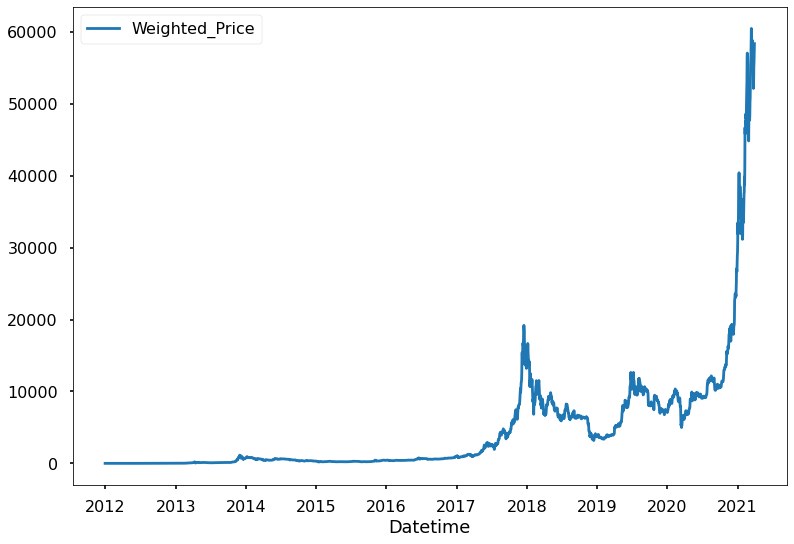

In [ ]:
btc.iloc[:-1, :].plot.line(y = "Weighted_Price", use_index = True)

In [ ]:
btc.iloc[:-1, :].corr()

,Open,High,Low,Close,Volume_(BTC),Weighted_Price,tomorrow,target
Open,1.000000,1.000000,1.000000,1.000000,-0.181898,1.000000,0.998999,0.015893
High,1.000000,1.000000,1.000000,1.000000,-0.181767,1.000000,0.998998,0.015891
Low,1.000000,1.000000,1.000000,1.000000,-0.182042,1.000000,0.999001,0.015905
Close,1.000000,1.000000,1.000000,1.000000,-0.181898,1.000000,0.999000,0.015901
Volume_(BTC),-0.181898,-0.181767,-0.182042,-0.181898,1.000000,-0.181911,-0.181465,0.028257
Weighted_Price,1.000000,1.000000,1.000000,1.000000,-0.181911,1.000000,0.999000,0.015900
tomorrow,0.998999,0.998998,0.999001,0.999000,-0.181465,0.999000,1.000000,0.030331
target,0.015893,0.015891,0.015905,0.015901,0.028257,0.015900,0.030331,1.000000


## Model Training

In [ ]:
train = btc.iloc[:-200]
test = btc.iloc[-200:]

predictors = ['Open', 'High', 'Low', 'Close', 'Volume_(BTC)', 
                                'Weighted_Price']

In [ ]:
def predict(train, test, predictors, model):
    model.fit(train[predictors], train["target"])
    preds = model.predict(test[predictors])
    preds = pd.Series(preds, index=test.index, name="predictions")
    combined = pd.concat([test["target"], preds], axis=1)
    return combined

In [ ]:
# Training on seasonalities
def backtest(data, model, predictors, start=1000, step=60):
    all_predictions = []

    for i in range(start, data.shape[0], step):
        train = data.iloc[0:i].copy()
        test = data.iloc[i:(i+step)].copy()
        predictions = predict(train, test, predictors, model)
        all_predictions.append(predictions)
    
    return pd.concat(all_predictions)

In [ ]:
from xgboost import XGBClassifier

model = XGBClassifier(random_state=1, learning_rate=.1, n_estimators=200)
predictions = backtest(btc, model, predictors)

## Model Evaluation

In [ ]:
predictions["predictions"].value_counts()

1    1371
0    1005
Name: predictions, dtype: int64

In [ ]:
predictions.head()

,target,predictions
Datetime,,
2014-09-26,0,0
2014-09-27,0,1
2014-09-28,0,1
2014-09-29,1,1
2014-09-30,1,1


In [ ]:
from sklearn.metrics import precision_score
precision_score(predictions["target"], predictions["predictions"])

0.5448577680525164

Text(56.3, 0.5, 'Truth')

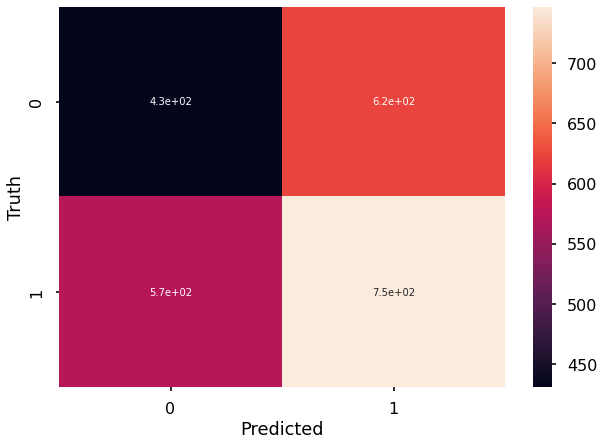

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(predictions["target"], predictions["predictions"])
cm

import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

# Time Series Forecast Model - GARCH MODEL
Predicting future bitcoin prices

In [ ]:
# Import libraries
!pip install -q arch
import seaborn as sns
from scipy import stats
from arch import arch_model
import statsmodels.api as sm
from itertools import product
from datetime import datetime
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

import warnings
plt.style.use('seaborn-poster')
warnings.filterwarnings("ignore")

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


### Data preparation function

In [ ]:
def wrangle(path):

    """Extract table data from database. Calculate returns.

    Parameters
    ----------
    path : str
        The path to the data directory.

    Returns
    -------
    pd.DataFrame
        Name will be `"return"`. There will be no `NaN` values.
    """
    # Get table from database
    df = pd.read_csv(path)

    # Interpolating Missing Values
    df = df.interpolate()
    
    # Change the timestamp column to datatime and set as index
    df["Timestamp"] = pd.to_datetime(df["Timestamp"], unit='s')
    df.set_index("Timestamp", inplace = True)
    #resample to daily readings
    df = df.resample("D").mean()
                
    # Create "return" column
    df["return"] = df["Close"].pct_change() * 100
    df.dropna(inplace = True)

    # Return returns
    return df["return"]

In [ ]:
df = wrangle("/content/bitcoin-historical-data/bitstampUSD_1-min_data_2012-01-01_to_2021-03-31.csv")
df.head()

Timestamp
2012-01-01     6.399499
2012-01-02     5.056517
2012-01-03     3.994399
2012-01-04     0.675480
2012-01-05    17.569486
Name: return, dtype: float64

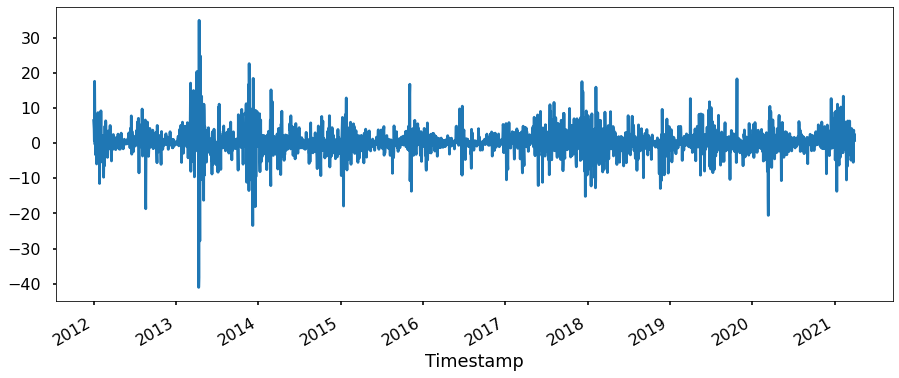

In [ ]:
plt.figure(figsize = (15,6))
df.plot();

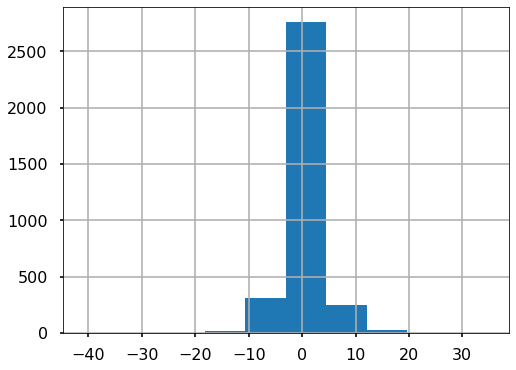

In [ ]:
# Check the distribution of the data
plt.figure(figsize = (8,6))
df.hist();

In [ ]:
# Check the daily volatility by the standard deviation
daily_volatility = df.std()
daily_volatility

3.769168261874188

In [ ]:
# Check the daily volatility
annual_volatility = df.std() * np.sqrt(252)
annual_volatility

59.83369122286007

In [ ]:
# Check the moving average forecast
rolling_30d_volatility = df.rolling(window=30).std().dropna()
rolling_30d_volatility.head()

Timestamp
2012-01-30    5.704066
2012-01-31    5.623593
2012-02-01    5.567336
2012-02-02    5.755529
2012-02-03    5.757306
Name: return, dtype: float64

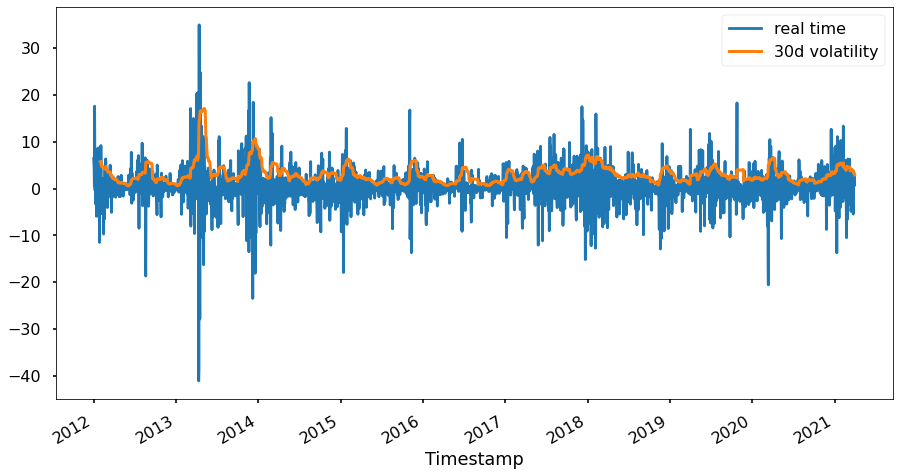

In [ ]:
plt.figure(figsize = (15,8))
df.plot(label = "real time")
rolling_30d_volatility.plot(label = "30d volatility", linewidth = 3)
plt.legend()
plt.show()

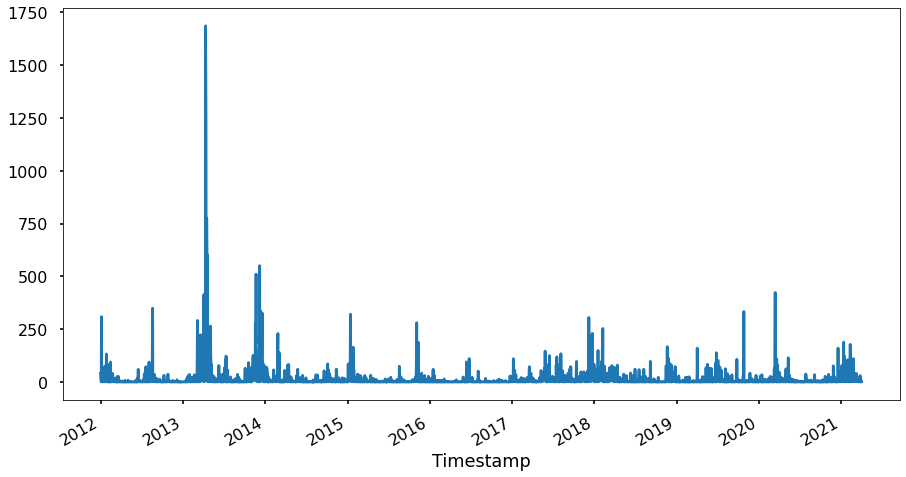

In [ ]:
# Check if the data is fit for GARCH model
# Plot squared returns

plt.figure(figsize = (15, 8))
(df**2).plot()

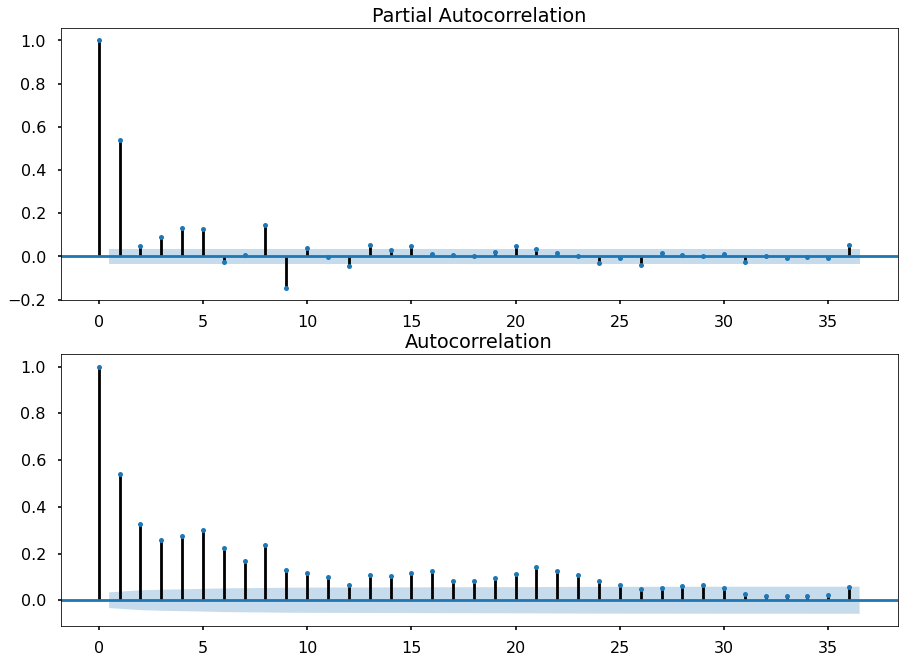

In [ ]:
plt.figure(figsize=(15, 11))
ax = plt.subplot(211)
plot_pacf(df**2, ax = ax);

ax = plt.subplot(212)
plot_acf(df**2, ax = ax);

### Split data

In [ ]:
cutoff = int(len(df) * 0.8)
df_train = df[:cutoff]
df_test = df[cutoff:]
print(
    f"""Total data: {df.shape[0]}
Train data: {df_train.shape[0]}
Test data: {df_test.shape[0]}"""
       )

Total data: 3375
Train data: 2700
Test data: 675


### Model Training


In [ ]:
# Build and train model
model = arch_model(
    df_train,
    p = 1, # Setting p and q to 1 gave the best result
    q = 1,
    rescale = False
).fit(disp = 0)
print("model type:", type(model))

# Show model summary
model.summary()

model type: <class 'arch.univariate.base.ARCHModelResult'>


<class 'statsmodels.iolib.summary.Summary'>
"""
                     Constant Mean - GARCH Model Results                      
==============================================================================
Dep. Variable:                 return   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:               -6616.06
Distribution:                  Normal   AIC:                           13240.1
Method:            Maximum Likelihood   BIC:                           13263.7
                                        No. Observations:                 2700
Date:                Sat, Dec 17 2022   Df Residuals:                     2699
Time:                        08:48:08   Df Model:                            1
                                Mean Model                                
==========================================================================
                 coef    std err          t      P>|t|    95.0% Conf. Int.
--------------------------------------------------------------------------
mu             0.1782  4.165e-02      4.278  1.888e-05 [9.653e-02,  0.260]
                             Volatility Model                             
==========================================================================
                 coef    std err          t      P>|t|    95.0% Conf. Int.
--------------------------------------------------------------------------
omega          0.3259      0.136      2.394  1.665e-02 [5.911e-02,  0.593]
alpha[1]       0.2501  3.530e-02      7.084  1.396e-12   [  0.181,  0.319]
beta[1]        0.7499  3.601e-02     20.827  2.470e-96   [  0.679,  0.820]
==========================================================================

Covariance estimator: robust
"""

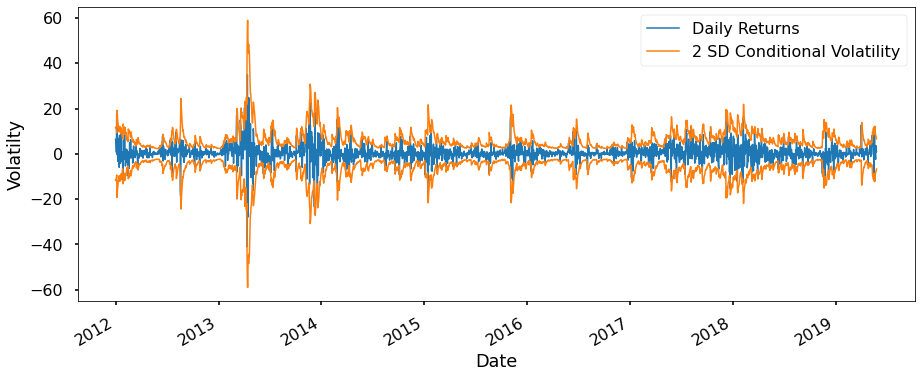

In [ ]:
fig, ax = plt.subplots(figsize=(15, 6))

# Plot `y_ambuja_train`
df_train.plot(ax = ax, label = "Daily Returns", linewidth = 1.5)

# Plot conditional volatility * 2
(2 * model.conditional_volatility).plot(
    ax = ax, label = "2 SD Conditional Volatility", color = "C1", linewidth = 1.5
)


# Plot conditional volatility * -2
(-2 * model.conditional_volatility.rename("")).plot(
    ax = ax, color = "C1", linewidth = 1.5
)

# Add axis labels
plt.xlabel("Date")
plt.ylabel("Volatilty")

# Add legend
plt.legend();

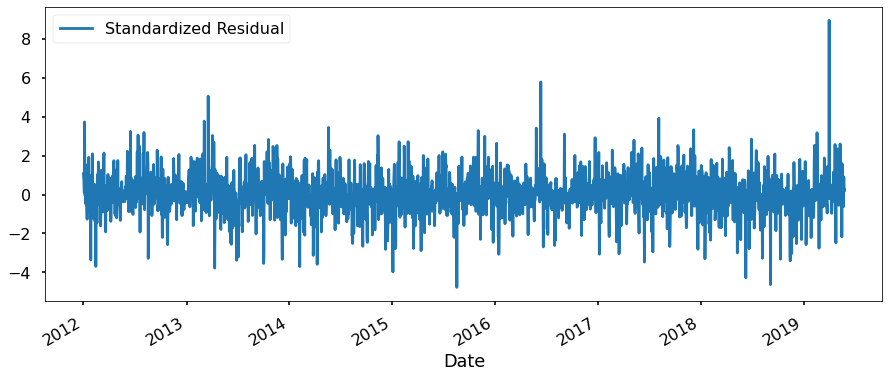

In [ ]:
fig, ax = plt.subplots(figsize=(15, 6))

# Plot standardized residuals
model.std_resid.plot(ax = ax, label = "Standardized Residual")

# Add axis labels
plt.xlabel("Date")


# Add legend
plt.legend();

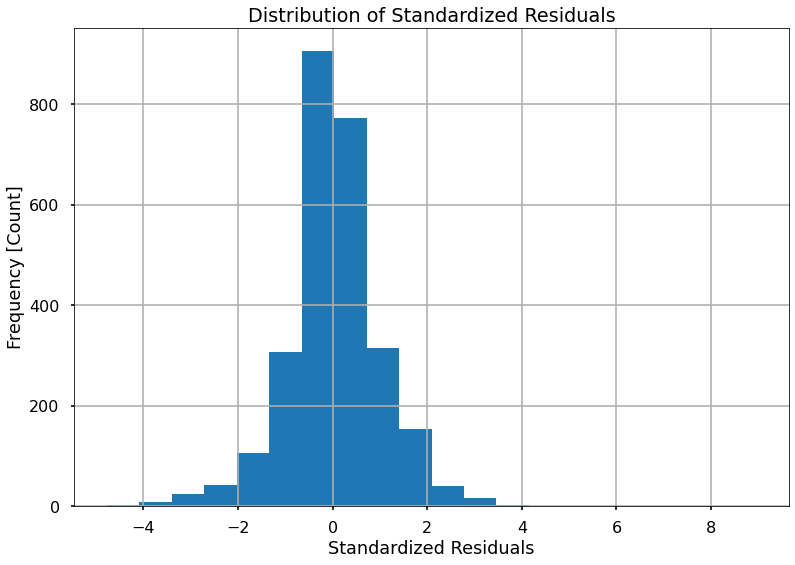

In [ ]:
# Create histogram of standardized residuals, 20 bins
model.std_resid.hist(bins = 20)

# Add axis labels
plt.xlabel("Standardized Residuals")
plt.ylabel("Frequency [Count]")

# Add title
plt.title("Distribution of Standardized Residuals");

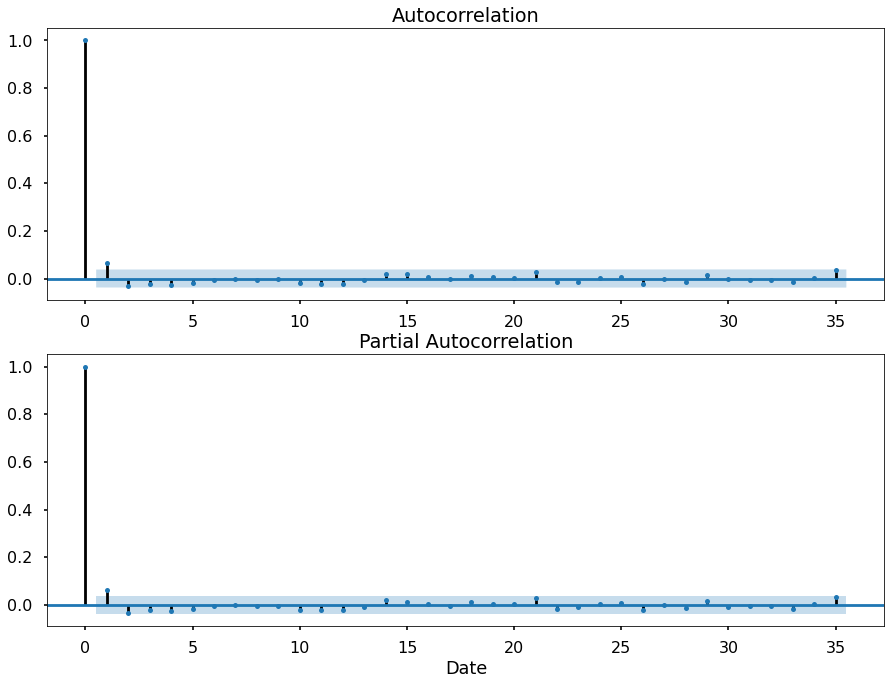

In [ ]:
#  Check for the performance of the model
plt.figure(figsize=(15, 11))

# Create ACF and PACF of squared, standardized residuals
ax = plt.subplot(211)
plot_acf(model.std_resid**2, ax =ax)

ax = plt.subplot(212)
plot_pacf(model.std_resid**2, ax =ax)

# Add axis labels
plt.xlabel("Date");

In [ ]:
# Predict for five days
one_day_forecast = model.forecast(horizon = 5, reindex = False).variance
np.sqrt(one_day_forecast)

,h.1,h.2,h.3,h.4,h.5
Timestamp,,,,,
2019-05-26,2.966146,3.020583,3.074056,3.126614,3.178304


### Model Evaluation

In [ ]:
# Create empty list to hold predictions
predictions = []

# Calculate size of test data (20%)
test_size = int(len(df) * 0.2)

# Walk forward
for i in range(test_size):
    # Create test data
    y_train = df.iloc[: -(test_size - i)]

    # Train model
    model = arch_model(
        y_train,
        p = 1,
        q= 1,
        rescale = False
    ).fit(disp = 0)

    # Generate next prediction (volatility, not variance)
    next_pred = model.forecast(horizon = 1, reindex = False).variance.iloc[0,0]**0.5
    

    # Append prediction to list
    predictions.append(next_pred)

# Create Series from predictions list
y_test_wfv = pd.Series(predictions, index=df.tail(test_size).index)

print("y_test_wfv type:", type(y_test_wfv))
print("y_test_wfv shape:", y_test_wfv.shape)
y_test_wfv.head()

y_test_wfv type: <class 'pandas.core.series.Series'>
y_test_wfv shape: (675,)


Timestamp
2019-05-27    2.966146
2019-05-28    4.740716
2019-05-29    4.172187
2019-05-30    3.704389
2019-05-31    3.268327
dtype: float64

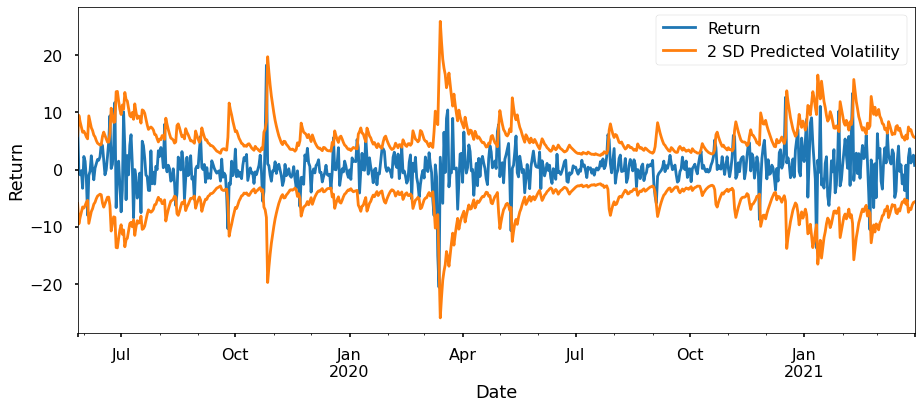

In [ ]:
fig, ax = plt.subplots(figsize=(15, 6))

# Plot returns for test data
df.tail(test_size).plot(ax=ax, label="Return")

# Plot volatility predictions * 2
(2 * y_test_wfv).plot(ax=ax, c="C1", label="2 SD Predicted Volatility")

# Plot volatility predictions * -2
(-2 * y_test_wfv.rename("")).plot(ax=ax, c="C1")

# Label axes
plt.xlabel("Date")
plt.ylabel("Return")

# Add legend
plt.legend();

The model seems to capture the flunctuation in the trend

### Model Inference Function


In [ ]:
def predict(model=model, horizon = 30, reindex=False):

    """Reformat model prediction to JSON.

    Parameters
    ----------
    model : model to be used
    horizon: number of predictions
    reindex: set to False
    
    Returns
    -------
    pd.DataFrame
        Forecast of volatility. Each key is date in ISO 8601 format.
        Each value is predicted volatility.
    """
    # Predict
    prediction = model.forecast(horizon=horizon, reindex=reindex).variance ** 0.5
    # Calculate forecast start date
    start = prediction.index[0] + pd.DateOffset(days = 1)

    # Create date range
    prediction_dates = pd.bdate_range(start=start, periods=prediction.shape[1])

    # Create prediction index labels, ISO 8601 format
    prediction_index = [d.isoformat() for d in prediction_dates]


    # Extract predictions from DataFrame, get square root
    data = prediction.values.flatten()

    # Combine `data` and `prediction_index` into Series
    prediction_formatted = pd.Series(data = data, index= prediction_index)

    # Return Series as dictionary
    return prediction_formatted.to_frame(name = "return")

In [ ]:
predict(horizon = 5)

,return
2021-03-31T00:00:00,2.817417
2021-04-01T00:00:00,2.880405
2021-04-02T00:00:00,2.942045
2021-04-05T00:00:00,3.002419
2021-04-06T00:00:00,3.061604
